# Vorlesung

## Python-Pakete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Einführungsbeispiel

Sie eröffnen in einer großen Stadt eine Jugendherberge mit 30 Betten und fragen sich: "Welchen Preis soll ich für eine Übernachtung verlangen?" Diese Frage macht solange keinen Sinn, bis Sie sich im Klaren sind, was ihre Zielgröße ist. Das typische Unternehmen verwendet als Zielgröße den Gewinn. Sie machen das auch und fragen sich konkreter: "Wie hängt mein Gewinn von meinem Preis für eine Übernachtung ab?" In mathematischer Sprache: "Wie lautet die Gewinnfunktion in Abhängigkeit vom Preis?"

Zur Beantwortung Ihrer Frage verwenden Sie folgende [Variablen](https://de.wikipedia.org/wiki/Variable_(Mathematik)):

- $x$ ... Anzahl der Übernachtungen pro Monat
- $p$ ... Preis für eine Übernachtung in EUR
- $K_f$ ... Fixkosten pro Monat in EUR
- $k_v$ ... Kosten pro Übernachtung (sogenannte variable Kosten) in EUR
- $K$ ... Gesamtkosten pro Monat in EUR
- $E$ ... Erlös (oder Ertrag oder Umsatz) pro Monat in EUR
- $G$ ... Gewinn pro Monat in EUR

und erheben folgende Daten:

- $K_f = 5000$
- $k_v = 10$
- Aus einer repräsentativen Umfrage ermitteln Sie die [Preis-Absatz-Funktion](https://de.wikipedia.org/wiki/Preis-Absatz-Funktion) $P(x) = 50 - 0.05x$. Sie gibt den Preis $p = P(x)$ an, der zu $x$ Übernachtungen pro Monat führt.

Schauen wir uns die Preis-Absatz-Funktion (engl. inverse demand function) genauer an:

Maximale Anzahl an Übernachtungen pro Monat = 915.
Minimaler Preis für eine Übernachtung = 4.25 EUR.


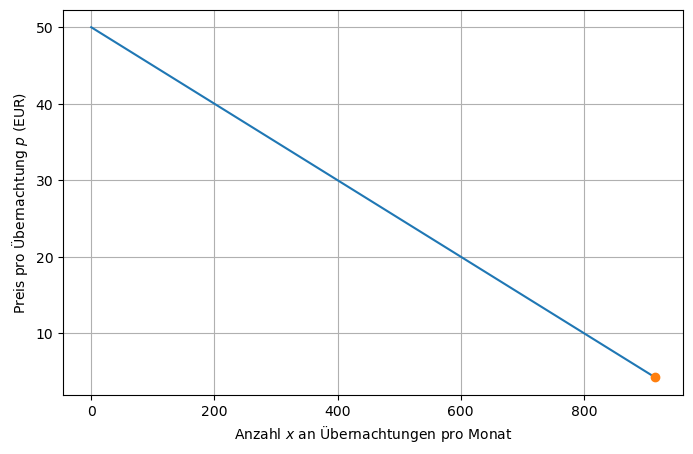

In [2]:
X = int(30.5*30)  # max. Anzahl an Übernachtungen pro Monat = 30.5 Tage mal 30 Betten
print(f"Maximale Anzahl an Übernachtungen pro Monat = {X}.")

x = np.arange(start=0, stop=X+1, step=1)

def P(x): # Preis-Absatz-Funktion
    return 50 - 0.05*x

print(f"Minimaler Preis für eine Übernachtung = {P(X)} EUR.")

plt.figure(figsize=(8,5))
plt.plot(x, P(x))
plt.plot(X, P(X), 'o')
plt.xlabel("Anzahl $x$ an Übernachtungen pro Monat")
plt.ylabel("Preis pro Übernachtung $p$ (EUR)")
plt.grid(True)

Wenn Sie einen niedrigeren Preis als den minimalen Preis verwenden, müssen Sie Buchungsanfragen ablehnen.

Auch die Kostenfunktion $K(x) = k_v x + K_f$ können wir über dem Bereich an möglichen Übernachtungen plotten:

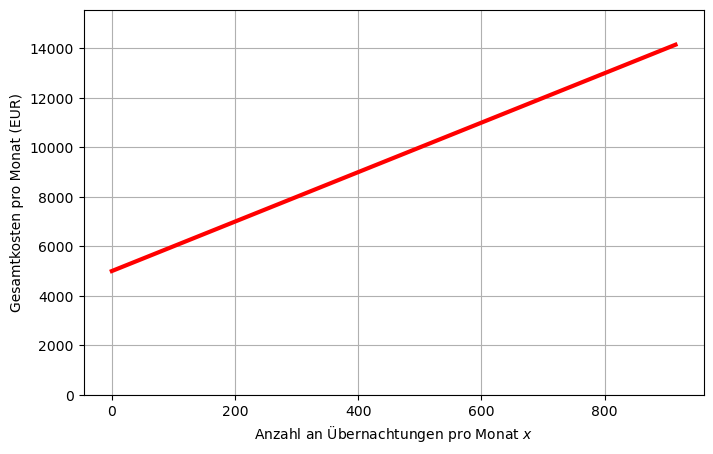

In [3]:
K_f = 5000
k_v = 10

def K(x):
    return k_v*x + K_f

plt.figure(figsize=(8,5))
plt.plot(x, K(x), '-r', linewidth=3)
plt.ylim(0, np.max(K(x))*1.1)
plt.xlabel("Anzahl an Übernachtungen pro Monat $x$")
plt.ylabel("Gesamtkosten pro Monat (EUR)")
plt.grid(True)

Es gilt allgemein, dass der Gewinn gleich dem Erlös minus den Kosten ist. Wir betrachten diese Gleichheit zuerst in Angängigkeit der Übernachtungen $x$ für einen fixen Preis $\bar{p}$ und bezeichnen die zugehörige Erlösfunktion mit $E_{\bar{p}}$ und die zugehörige Gewinnfunktion mit $G_{\bar{p}}$:

$$\begin{align}
G_{\bar{p}}(x) &= E_{\bar{p}}(x) - K(x) \\
               &= \bar{p}x - (k_v x + K_f) \\
               &= (\bar{p} - k_v)x - K_f \\
               &= (\bar{p} - 10)x - 5000
\end{align}$$

Wir generieren Beispiel-Plots von Erlösfunktionen für ein paar Preise $\bar{p}$ gemeinsam mit der Kostenfunktion:

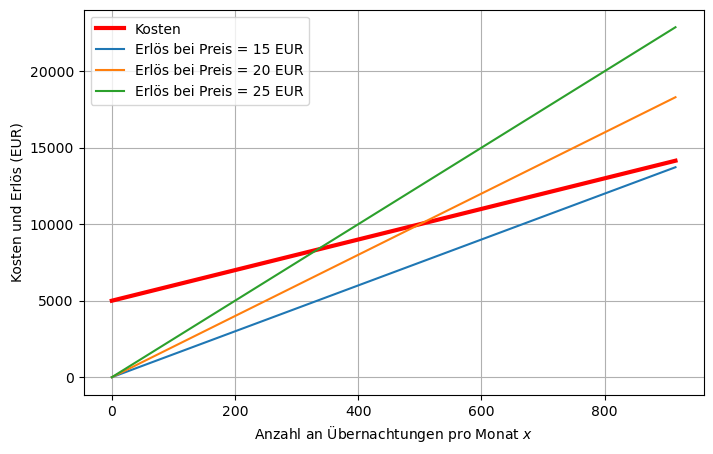

In [4]:
p_bar_list = [15, 20, 25]

plt.figure(figsize=(8,5))
plt.plot(x, K(x), '-r', label='Kosten', linewidth=3)
for p_bar in p_bar_list:
    E = p_bar*x
    plt.plot(x, E, label=f"Erlös bei Preis = {p_bar} EUR")
plt.xlabel("Anzahl an Übernachtungen pro Monat $x$")
plt.ylabel("Kosten und Erlös (EUR)")
plt.legend()
plt.grid(True)

Die Schnittpunkte geben die Gewinnschwellen an: Ab diesen Anzahlen an Übernachtungen machen Sie Gewinn. 

Hier die Gewinnfunktionen zu den fixen Preisen $\bar{p}$ von vorher:

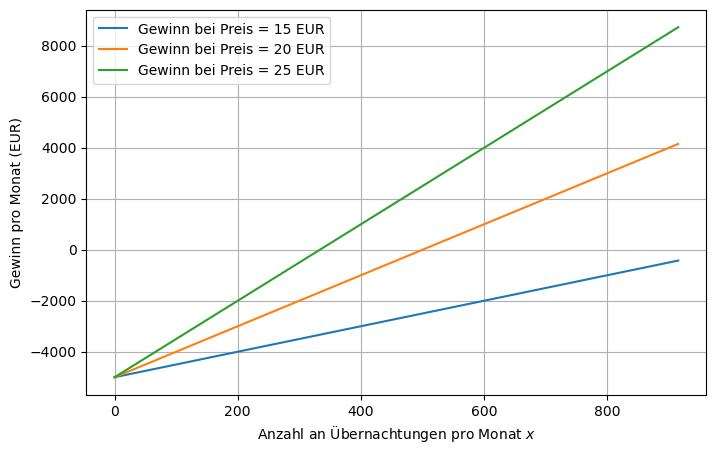

In [5]:
plt.figure(figsize=(8,5))
for p_bar in p_bar_list:
    G = (p_bar - 10)*x - 5000
    plt.plot(x, G, label=f"Gewinn bei Preis = {p_bar} EUR")
plt.xlabel("Anzahl an Übernachtungen pro Monat $x$")
plt.ylabel("Gewinn pro Monat (EUR)")
plt.legend()
plt.grid(True)

**Diese Analyse ist allerdings irreführend, denn zu einem fixierten Preis $\bar{p}$ lässt sich die Anzahl der Übernachtungen nicht frei wählen!** Wenn wir die Preis-Absatz-Funktion $p = P(x) = 50 - 0.05x$ durch die Umformungen

$$\begin{align}
    p &= 50 - 0.05x \\
0.05x &= -p + 50 \\
    x &= -20p + 1000
\end{align}$$

zur Absatz-Preis-Funktion $x = -20p + 1000 =: A(p)$ umkehren, erhalten wir für jeden Preis $p$ die zugehörige Anzahl an Übernachtungen. Für die Beispielpreise von vorher sind das folgende:

In [6]:
def A(p):
    return -20*p + 1000

for p_bar in p_bar_list:
    x_bar = A(p_bar)
    G = (p_bar - 10)*x_bar - 5000
    print(f"Beim Preis {p_bar} EUR übernachten {x_bar} Leute.")
    print(f"Der Gewinn beträgt dann {G} EUR\n")

Beim Preis 15 EUR übernachten 700 Leute.
Der Gewinn beträgt dann -1500 EUR

Beim Preis 20 EUR übernachten 600 Leute.
Der Gewinn beträgt dann 1000 EUR

Beim Preis 25 EUR übernachten 500 Leute.
Der Gewinn beträgt dann 2500 EUR



Wenn wir den Gewinn in Abhängigkeit der Übernachtungen $x$ angeben wollen, müssen wir daher den zu $x$ gehörenden Preis $p = P(x) = 50 - 0.05x$ verwenden:

$$\begin{align}
G_{\text{Übn}}(x) &= P(x)x - (k_v x + K_f) \\
                  &= (50 - 0.05x)x - (10 x + 5000) \\
                  &= - 0.05x^2 + 40x -5000
\end{align}$$

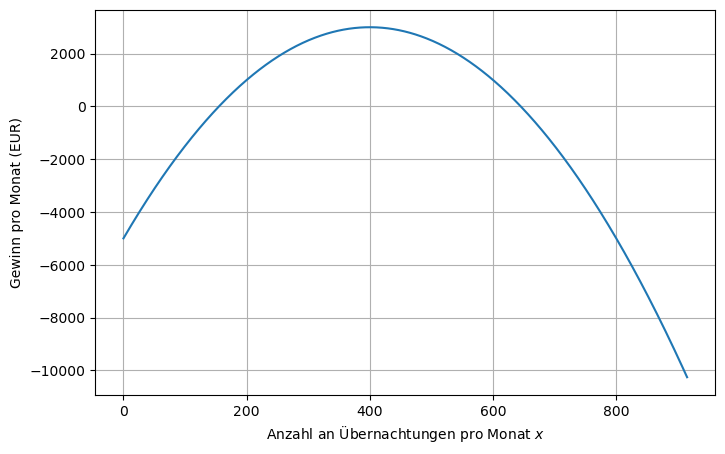

In [7]:
def G_Uebn(x):
     return P(x)*x - K(x)

plt.figure(figsize=(8,5))
plt.plot(x, G_Uebn(x))
plt.xlabel("Anzahl an Übernachtungen pro Monat $x$")
plt.ylabel("Gewinn pro Monat (EUR)")
plt.grid(True)

Und für die Angängigkeit des Gewinns vom Preis $p$ müssen wir die Anzahl an Übernachtungen $x = A(p) = -20p + 1000$ verwenden:

$$\begin{align}
G_{\text{Preis}}(p) &= pA(p) - [k_v A(p) + K_f] \\
                    &= p(-20p + 1000) - [ 10(-20p + 1000) + 5000] \\
                    &= -20p^2 + 1200p - 15000
\end{align}$$

Diese Funktion beantwortet Ihre anfängliche Frage "Wie hängt mein Gewinn von meinem Preis für eine Übernachtung ab?". Hier der Plot des Funktionsgraphen:

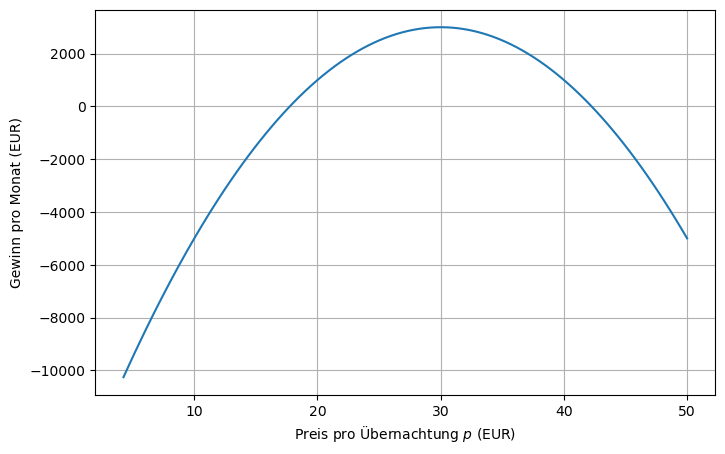

In [8]:
def G_Preis(p):
     return p*A(p) - (k_v*A(p) + K_f)

p = np.linspace(start=P(X), stop=P(0), num=100)
plt.figure(figsize=(8,5))
plt.plot(p, G_Preis(p))
plt.xlabel("Preis pro Übernachtung $p$ (EUR)")
plt.ylabel("Gewinn pro Monat (EUR)")
plt.grid(True)

Aus den Graphen der Gewinnfunktionen $G_{\text{Übn}}$ und $G_{\text{Preis}}$ können wir die Gewinnschwellen (=Nullstellen) im Bezug auf Anzahl Übernachtungen bzw. Preis pro Übernachtung ablesen. Zwischen den Gewinnschwellen erwirtschaften Sie (positiven) Gewinn, außerhalb ist der Gewinn negativ, d. h. sie machen Verlust. Das Setting, das zum maximalen Gewinn führt, lässt sich mit Hilfe der Differentialrechnung bestimmen.

**Achtung:** Wir haben im obigen Beispiel absichtlich eine detaillierte Notation verwendet, die zwischen Variablen wie z. B. $x$ und $p$, Funktionsnamen wie z. B. $K$ und $G_{\text{Übn}}$ und fixierten Werten (Parametern) wie z. B. $\bar{p}$ unterscheidet. Das beugt Missverständnissen vor, hat aber den Nachteil der wachsenden Unübersichtlichkeit.

Oft geht man den (vermeintlich) angenehmeren Weg und verwendet dieselben Symbole für an sich unterschiedliche Dinge:

- Die Preis-Absatz-Funktion wird als $p(x) =  50 - 0.05x$ oder $p = 50 - 0.05x$ geschrieben.
- Zwischen $G_{\text{Übn}}$ und $G_{\text{Preis}}$ wird nicht explizit unterschieden, wenn man $G(x) = - 0.05x^2 + 40x -5000$ und $G(p) = -20p^2 + 1200p - 15000$ schreibt.

**Literatur:** Zum Beispiel im Buch "Mathematik im Betrieb" von Holland et al. finden Sie in den Abschnitten "2.5 Ökonomische lineare Funktionen" und "5.7 Wirtschaftswissenschaftlicheder Differentialrechnung" mehr zum Thema.

## Funktionen

Funktionen (auch Abbildungen genannt) dienen zur Beschreibung von **Zusammenhängen vom Typ "Wenn ..., dann ..."**. Wenn der Zusammenhang quantitativer Natur ist, werden den numerischen Werten der Wenn-Größe numerische Werte der Dann-Größe zugeordnet. Hier die formale **Definition** einer reellen (weil reelle Zahlen als numerische Werte verwendet werden) Funktion, auf die wir uns in diesem Abschnitt beschränken:

Eine **relle Funktion** ist eine Vorschrift, z. B. $f$ genannt, die jedem Element $x\in D \subseteq \mathbb{R}$ genau ein Element $y \in W \subseteq \mathbb{R}$ zuordnet, in Zeichen:

$$\begin{align}
f: D &\to     W \\
   x &\mapsto y = f(x)
\end{align}$$

- $f$ der Name der Funktion
- $D$ ist der Definitionsbereich
- $W$ ist der Wertebereich
- $x$ ist das Argument, die Stelle, die unabhängige Variable, die unabhängige Veränderliche, der Input
- $y$ ist die abhängige Variable, die abhängige Veränderliche, der Output
- $f(x)$ ist der Funktionswert an der Stelle $x$, das Bild von $x$.

Wie der Funktionswert aus dem Argument berechnet wird, gibt die Funktionsgleichung an, z. B. $f(x) = 3x^2 - \sin(x)$. 

Hinweise:

- Wenn es zu keinen Missverständnissen führt, wird bei der Angabe einer Funktion oft auf die explizite Angabe des Definitions- und Wertebereichs verzichtet, und man gibt nur die Funktionsgleichung oder sogar nur deren rechten Term (im obigen Beispiel $3x^2 - \sin(x)$) an. 
- Of verzichtet man auf die explizite Angabe eines Funktionsnamens wie in $y = f(x) = \ldots$ und schreibt nur $y(x) = \ldots$.
- Die Variable $x$ in der Funktionsgleichung $f(x) = 3x^2 - \sin(x)$ kann problemlos umbenannt werden. Die Funktionsgleichung $f(a) = 3a^2 - \sin(a)$ repräsentiert die gleiche Vorschrift. $x$ und $a$ sind in dieser Situation sogenannte Dummy-Variablen.

## Darstellungen

**Venn-Diagramme** stellen die Funktionszuordnung mengentheoretisch dar.

![Venn.png](../abbildungen/Venn.png)

*Quelle:* Stry, Yvonne; Schwenkert, Rainer (2013): Mathematik kompakt: für Ingenieure und Informatiker. 4. Auflage, Springer Vieweg.

**Wertetabelle** reeller Funktionen geben in einer Tabelle eine Auswahl an Wertepaaren $x \in D$ und $f(x) \in W$ an.

In [9]:
def f(x):
    return 1/(1 + x**2)

In [10]:
D = [-2, -1, 0, 1, 2]
print("x  | f(x)")
print("----------")
for x in D:
    print(f"{x:2.0f} | {f(x):1.3f}")

x  | f(x)
----------
-2 | 0.200
-1 | 0.500
 0 | 1.000
 1 | 0.500
 2 | 0.200


Der **Graph** einer reellen Funktion zeichnet die Paare $(x,f(x))$ als Punkte in ein Koordinatensystem ein.

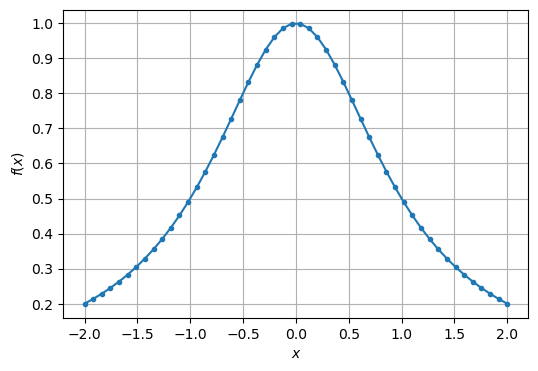

In [11]:
x = np.linspace(-2, 2, num=50)

plt.figure(figsize=(6,4))
plt.plot(x, f(x), '.-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)

*Bemerkung:* Für mehrdimensionale Funktionen $f:\mathbb{R}^n \to \mathbb{R}^m$ gibt es noch andere Darstellungsmöglichkeiten wie Kurven, Kontourplots und Vektorfelder.

## Gleichungen und Umkehrfunktionen

Um die Ein- oder Mehrdeutigkeit und Umkehrbarkeit einer Funktion zu beschreiben, werden folgende Begriffe verwendet:

- Eine Funktion $f$ ist **injektiv**, wenn ungleichen Inputs ungleiche Outputs zugeordnet werden: $a \neq b \implies f(a) \neq f(b)$. Dann gilt für die Gleichung $f(x)= y$, in der $y \in W$ gegeben und $x \in D$ gesucht ist, dass eine Lösung, falls existent, eindeutig ist.

- Eine Funktion $f$ ist **surjektiv**, wenn jedes Element $y \in W$ der Funktionswert mindestens eines $x \in D$ ist. Dann gibt es zu jedem $y \in W$ eine oder mehrere Lösung/en der Gleichung $f(x)= y$.

- Eine Funktion $f$ ist **bijektiv**, wenn sie sowohl injektiv als
auch surjektiv ist. Dann ist die Gleichung $f(x)= y$ für jedes $y \in W$ eindeutig lösbar.

Eine bijektive Funktion $f$ ist also umkehrbar. Die Umkehrfunktion, auch inverse Funktion genannt, wird mit $f^{-1}$ bezeichnet:

$$\begin{align}
f^{-1}: W &\to     D \\
   y &\mapsto x = f^{-1}(y)
\end{align}$$

Zur Bestimmung der Umkehrfunktion löst man die Funktionsgleichung $y=f(x)$ nach x auf und erhält dadurch die Funktionsgleichung $x=f^{-1}(y)$ der Umkehrfunktion $f^{-1}$.

**Achtung:** Oft wird statt $f^{-1}(y) = \ldots$ wieder $x$ als Argument verwendet und $f^{-1}(x) = \ldots$ geschrieben. Das ist problemlos, da das Argument einer Funktionsgleichung eine Dummy-Variable ist.

Der Graph mit Punkten $(x,f(x))$ einer umkehrbaren Funktion $f$ und der Graph mit Punkten $(x,f^{-1}(x))$ ihrer Umkehrfunktion $f^{-1}$ spiegeln sich an der 1. Mediane. Hier ein Beispiel:

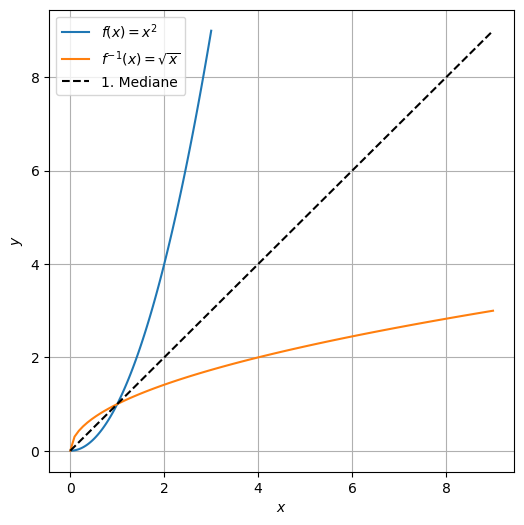

In [12]:
def f(x):
    """Definitionsbereich x>0"""
    return x**2

def f_inv(x):
    """Definitionsbereich x>0"""
    return np.sqrt(x)

plt.figure(figsize=(6,6))
x = np.linspace(0, 3, num=100)
plt.plot(x, f(x), label="$f(x) = x^2$")
x = np.linspace(0, 9, num=100)
plt.plot(x, f_inv(x), label="$f^{-1}(x) = \sqrt{x}$")
plt.plot(x, x, '--k', label='1. Mediane')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

## Eigenschaften

### Monotonie

Eine Funktion $f: D \to W$ heißt in einem Intervall $I \subseteq D$

- monoton steigend, wenn $a<b \implies f(a) \leq f(b)$ für alle $a,b \in I$ gilt.
- monoton fallend,  wenn $a<b \implies f(a) \geq f(b)$ für alle $a,b \in I$ gilt.
- streng monoton steigend, wenn $a<b \implies f(a) < f(b)$ für alle $a,b \in I$ gilt.
- streng monoton fallend,  wenn $a<b \implies f(a) > f(b)$ für alle $a,b \in I$ gilt.

*Beispiel:* $f(x) = x^2$ ist im Intervall $(-\infty, 0]$ streng monoton fallend und im Intervall $[0, \infty)$ streng monton steigend.

*Folgerung:* Eine im ganzen Definitionsbereich streng monotone (steigend oder fallend) Funktion lässt sich umkehren.

### Periodizität

Ist $f$ eine auf $\mathbb{R}$ definierte Funktion, d. h. $f: \mathbb{R} \to W$, und gilt für eine Konstante $p > 0$, dass

$$f(x + p) = f(x)$$

für alle $x \in \mathbb{R}$, dann heißt $f$ periodisch mit der Periode $p$. Auch $2p, 3p, \ldots$ sind dann Perioden.

*Beispiel:* Die kleinste Periode von $\sin(x)$ und $\cos(x)$ ist $2\pi$.

*Folgerung:* Die Funktionswerte müssen nur über eine Periode berechnet werden.

### Symmetrie

Eine Funktion $f: \mathbb{R} \to W$ heißt

- gerade,   wenn $f(-x) =  f(x)$ für alle $x \in \mathbb{R}$ gilt. 
- ungerade, wenn $f(-x) = -f(x)$ für alle $x \in \mathbb{R}$ gilt.

*Beispiele:*

- gerade Funktionen: Potenzfunktionen mit geradzahligen Exponenten: $x^0 = 1$ (konstante Eins-Funktion), $x^2$, $x^4$, $x^6$, ..., $\cos(x)$, $|x|$
- ungerade Funktionen: Potenzfunktionen mit ungeradzahligen Exponenten: $x^1 = x$, $x^3$, $x^5$, $x^7$, ..., $\sin(x)$

*Folgerungen:*

- Gerade Funktionen sind symmetrisch bzgl. der $y$-Achse.
- Ungerade Funktionen sind punktsymmetrisch bzgl. des Koordinatenursprungs.
- Die Funktionswerte müssen nur für $x \geq 0$ oder $x \leq 0$ berechnet werden.

### Nullstellen

Eine Stelle $x_0$ im Definitionsbereich einer Funktion $f$ heißt Nullstelle, wenn $f(x_0) =0$ gilt.
Nullstellen sind allgemein interessant, weil sich jede Bedingung "schnick(x) = schnack(x)" zu einer Nullstellenbedingung umformen lässt: "schnick(x) - schnack(x) = 0.

### Polstellen

Eine Stelle $x$, an der eine Funktion nicht definiert ist und in deren Umgebung die Funktionswerte beliebig groß (positiv oder negativ) werden, bezeichnet man als Polstelle oder kürzer als Pol der Funktion. Derartige Singularitäten passieren typischerweise, wenn der Nenner einer Funktion Null wird. Beispiel: $f(x) = \frac{1}{x - 3}$ hat bei $x = 3$ eine Polstelle.

## Operationen

### Addition, Subtraktion, Multiplikation, Division

Funktionen werden punktweise addiert, subtrahiert, multipliziert und dividiert, genauer:

$$\begin{align}
(f   +   g)(x) &= f(x)   +   g(x) \\
(f   -   g)(x) &= f(x)   -   g(x) \\
(f \cdot g)(x) &= f(x) \cdot g(x) \\
\frac{f}{g}(x) &= \frac{f(x)}{g(x)}
\end{align}$$

Hier ein Beispiel:

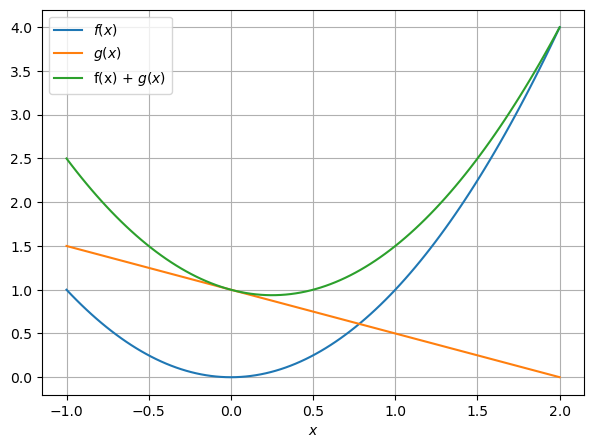

In [13]:
x = np.linspace(-1, 2, num=100)

f = lambda x: x**2
g = lambda x: 1 -0.5*x

plt.figure(figsize=(7,5))
plt.plot(x, f(x), label='$f(x)$')
plt.plot(x, g(x), label='$g(x)$')
plt.plot(x, f(x) + g(x), label='f(x) + $g(x)$')
plt.xlabel('$x$')
plt.legend()
plt.grid(True)

### Geometrische Operationen am Graphen

| Ersetzt man $y = f(x)$ durch | so wird der zugehörige Graph               |
| ---------------------------- | ------------------------------------------ |
| $y = f(x - x_0)$             | um $x_0$ in $x$-Richtung verschoben        |
| $y = f(x) + y_0$             | um $y_0$ in $y$-Richtung verschoben        |
| $y = -f(x)$                  | an der $x$-Achse gespiegelt                |
| $y = f(-x)$                  | an der $y$-Achse gespiegelt                |
| $x = f(y)$                   | an der 1. Mediane gespiegelt               |
| $y = af(x)$                  | in $y$-Richtung mit Faktor $a>0$ gestreckt |
| $y = f(x/a)$                 | in $x$-Richtung mit Faktor $a>0$ gestreckt |

### Hintereinanderschaltung

Der Output einer Funktion $g$ kann als Input einer zweiten Funktion $f$ dienen, falls der Wertebereich von $g$ im Definitionsbereich von $f$ liegt. Unter dieser Voraussetzung schreibt man die Hintereinanderschaltung (Kompositon, Verkettung) von zuerst $g$ und dann $f$ als $f \circ g$, was als "$f$ nach $g$" ausgeprochen wird. Ein $x$ aus dem Definitionsbereich von $g$ wird von $f \circ g$ auf $(f \circ g)(x) = f(g(x))$ im Wertebereich von $f$ abgebildet.

*Beispiel:* $f(x) = \sqrt{x}$, $g(x) = 1 + x^2$, $(f \circ g)(x) = \sqrt{ 1 + x^2}$

## Elementare Funktionen

### Signum-Funktion

Die Signum-Funktion returniert das Vorzeichen einer Zahl und ist definiert als

$$\text{sgn}(x) = \left\{
\begin{array}{ll}
 1 & x > 0 \\
 0 & x = 0 \\
-1 & x < 0
\end{array}\right.$$

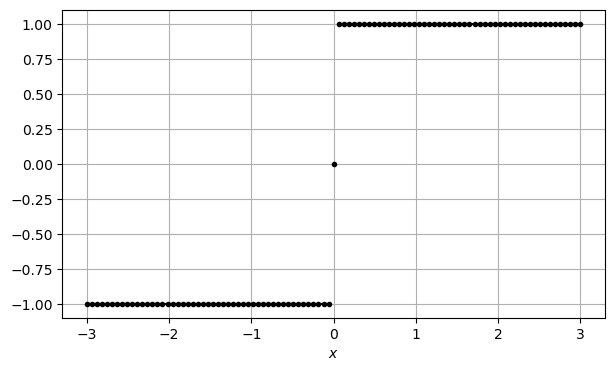

In [14]:
plt.figure(figsize=(7,4))

x = np.linspace(-3, 0)[:-1]
plt.plot(x, np.sign(x), '.-k')

x = 0
plt.plot(x, np.sign(x), '.-k')

x = np.linspace(0, 3)[1:]
plt.plot(x, np.sign(x), '.-k')

plt.xlabel("$x$")
plt.grid(True)

### Betragsfunktion

Die Betragsfunktion ist definiert als

$$|x| = \left\{
\begin{array}{ll}
 x & x \geq 0 \\
-x & x   <  0
\end{array}\right.$$

und stimmt mit $\sqrt{x^2}$ überein.

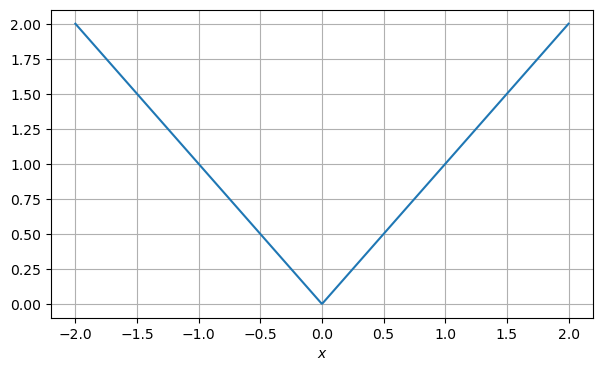

In [15]:
x = np.linspace(-2, 2, num=1000)
y = np.abs(x)

plt.figure(figsize=(7,4))
plt.plot(x, y)
plt.xlabel("$x$")
plt.grid(True)

### Polynome

Polynome sind Summen aus skalierten Potenzfunktionen, zum Beispiel $p(x) = -3 + 2x + 5x^2 - x^4$. Der Grad des Polynoms ist der höchste Exponent. Im vorigen Beispiel ist der Grad 4. Die allgemeine Form eines Polynoms $n$-ten Grades lautet

$$p(x) = a_0 + a_1 x + a_2 x^2 + \ldots a_{n-1} x^{n-1} + a_n x^n$$

mit $a_n \neq 0$. Die Zahlen $a_i$ für $i = 0, \ldots, n$ sind die Koeffizienten des Polynoms.

Unter den Polynomen finden sich viele bekannte Funktionen

- Polynome vom Grad 0 sind konstante Funktionen, d. h. horizontale Geraden
- Polynome vom Grad 1 umfassen alle anderen Geraden.
- Polynome vom Grad 2 sind Parabeln.

Ein Polynom $n$-ten Grades hat maximal $n$ reelle Nullstellen. Dies ist für Geraden und Parabeln anschaulich.

Warum sind Polynome nützlich?

- Polynome lassen sich gut interpretieren.
- Die Berechnugn der Funktionswerte benötigt nur elementare Rechenoperationen, die ein Computer gut umsetzen kann.
- Mit Polynomen lassen sich so gut wie alle anderen Funktionen beliebig genau approximieren.

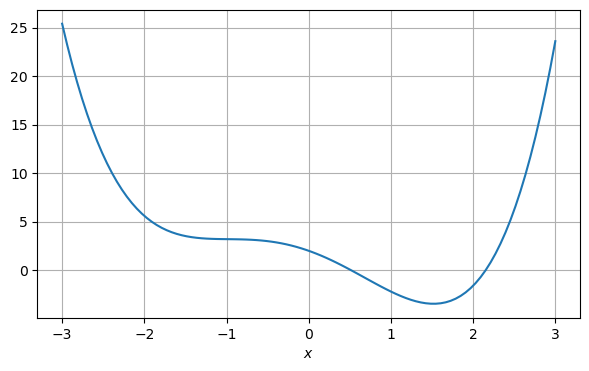

In [16]:
# Beispielpolynom:

x = np.linspace(-3, 3, num=100)
y = 2 - 3*x - 2*x**2 + 0.3*x**3 + 0.5*x**4

plt.figure(figsize=(7,4))
plt.plot(x, y)
plt.xlabel("$x$")
plt.grid(True)

### Trigonometrische Funktionen

Für die geometrische Definition der trigonometrische Funktionen $\sin$ und $\cos$ verwenden wir den Einheitskreis:

![Einheitskreis.png](../abbildungen/Einheitskreis.png)

*Quelle:* Stry, Yvonne; Schwenkert, Rainer (2013): Mathematik kompakt: für Ingenieure und Informatiker. 4. Auflage, Springer Vieweg.

Mit Hilfe des [Strahlensatzes](https://de.wikipedia.org/wiki/Strahlensatz) erkennt man, dass im ersten Quadranten ($0 \leq \alpha < \frac{\pi}{2}$) folgende Gleichungen gelten:

$$\begin{align}
\tan(\alpha) &= \frac{\sin(\alpha)}{\cos(\alpha)} \\
\cot(\alpha) &= \frac{\cos(\alpha)}{\sin(\alpha)}
\end{align}$$

Diese Gleichungen werden zur Definition der Funktionen $\tan$ und $\cot$ für alle Winkel verwendet.

Ebenfalls mit Hilfe des [Strahlensatzes](https://de.wikipedia.org/wiki/Strahlensatz) erhält man die bekannten Beziehungen 

- $\sin(\alpha) = \frac{\text{Gegenkathete}}{\text{Hypotenuse}}$
- $\cos(\alpha) = \frac{\text{Ankathete}}{\text{Hypotenuse}}$

im rechtwinkligen Dreieck:

![Rechtwinkliges_Dreieck.png](../abbildungen/Rechtwinkliges_Dreieck.png)

*Quelle:* Stry, Yvonne; Schwenkert, Rainer (2013): Mathematik kompakt: für Ingenieure und Informatiker. 4. Auflage, Springer Vieweg.

Der Satz von Pythagoras lautet

$$\text{Ankathete}^2 + \text{Gegenkathete}^2 = \text{Hypotenuse}^2$$

und liefert nach Division durch $\text{Hypotenuse}^2$

$$\cos^2(\alpha) + \sin^2(\alpha) = 1.$$

Für die vielen weiteren Eigenschaften von [trigonometrischen Funktionen](https://de.wikipedia.org/wiki/Trigonometrische_Funktion) wird auf die Literatur verwiesen.

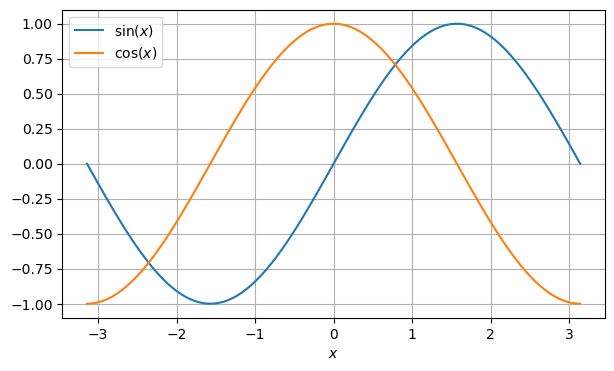

In [17]:
x = np.linspace(-np.pi, np.pi, num=100)

plt.figure(figsize=(7,4))
plt.plot(x, np.sin(x), label='$\sin(x)$')
plt.plot(x, np.cos(x), label='$\cos(x)$')
plt.xlabel("$x$")
plt.legend()
plt.grid(True)

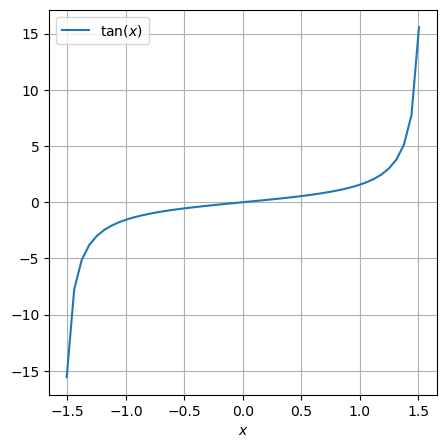

In [18]:
x = np.linspace(-np.pi/2, np.pi/2, num=50)[1:-1]

plt.figure(figsize=(5,5))
plt.plot(x, np.tan(x), label='$\\tan(x)$')
plt.xlabel("$x$")
plt.legend()
plt.grid(True)

### Exponentialfunktion und Logarithmus

Eine Funktion vom Typ $f(x) = a^x$ mit $a>0$, deren Argument im Exponenten steht, heißt Exponentialfunktion. Exponentialfunktionen dienen zur Beschreibung von (auch negativen) Wachstumsprozessen, bei denen die zeitliche Änderung einer Größe proportional zum aktuellen Wert der Größe ist. Beispiel sind

- Wachstum einer Population
- Verzinsung mit Zinseszinsen
- radioaktiver Zerfall
- Abkühlungprozesse

Am gebräuchlichsten ist die Exponentialfunktion $f(x) = e^x$, kurz $e$-Funktion genannt. Dabei ist $e \simeq 2.7182818$ die Euler’sche Zahl. Hier die Graphen von $e^x$ und $e^{-x}$:

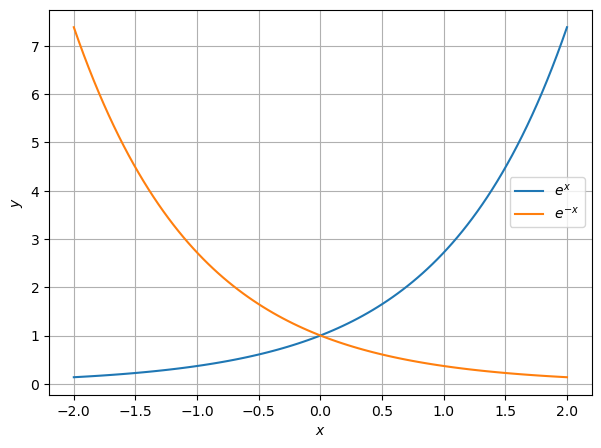

In [19]:
x = np.linspace(-2, 2, num=100)

plt.figure(figsize=(7,5))
plt.plot(x, np.exp( x), label='$e^x$')
plt.plot(x, np.exp(-x), label='$e^{-x}$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)

Eigenschaften und Rechenregeln:

- Die Werte der $e$-Funktion sind positiv, also insbesondere nicht Null.
- $e^0 = 1$
- $e^a e^b = e^{a + b}$
- $e^{-x} = \frac{1}{e^x}$

Da die Exponentialfunktion $e^x$ streng monoton wachsend ist, kann man die Gleichung $e^x = y$ für jedes $y > 0$ nach $x$ auflösen. Die Umkehrfunktion der Exponentialfunktion heißt natürlicher Logarithmus $\ln$.

*Achtung:* In vielen Programmierpsrachen, so auch in Python, wird `log` für den natürlichen Logarithmus verwendet.

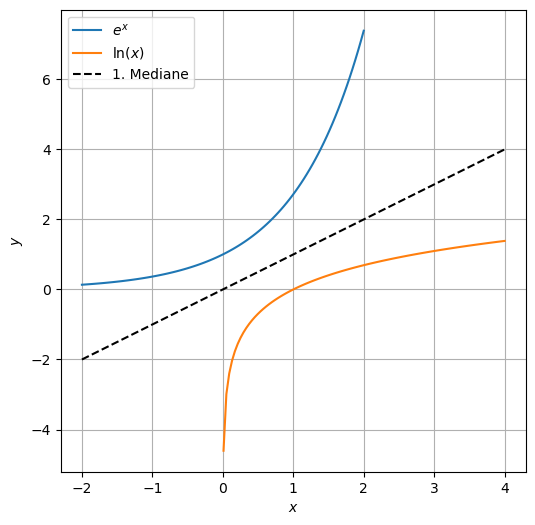

In [20]:
plt.figure(figsize=(6,6))
x = np.linspace(-2, 2, num=100)
plt.plot(x, np.exp(x), label="$e^x$")
x = np.linspace(0.01, 4, num=100)
plt.plot(x, np.log(x), label="$\ln(x)$")
x = np.linspace(-2, 4, num=100)
plt.plot(x, x, '--k', label='1. Mediane')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left')
plt.grid(True)

Eigenschaften und Rechenregeln:

- $\ln(1) = 0$
- $\ln(a\cdot b) = \ln(a) + \ln(b)$
- $\ln(\frac{a}{b}) = \ln(a) - \ln(b)$
- $e^{\ln(x)} = x$
- $\ln(e^x) = x$
- $a^x = [e^{\ln(a)}]^x = e^{x\ln(a)}$